<a href="https://colab.research.google.com/github/FadouaKhm/CSE-590---Spring-2021---Intro-to-ML-and-DL-Tutorials/blob/main/%5BIntro_to_DL%5DGetting_started_Logistic_Regression_for_Breast_Cancer_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequesites

### Python
You first need to set up a Python environment (if you do not have done so already). The easiest way to do this is by installing Anaconda. We will be using Python 3, so be sure to install the right version.
link: https://docs.anaconda.com/anaconda/user-guide/getting-started/

#### Why Python?
Many data-heavy applications are now developed in Python
- Highly readable, less complexity, fast prototyping
- Easy to offload number crunching to underlying C/Fortran/...
- Easy to install and import many rich libraries
- numpy: efficient data structures
- scipy: fast numerical recipes
- matplotlib: high-quality graphs
- scikit-learn: machine learning algorithms
- tensorflow: neural networks

### Required packages
Next, you'll need to install several packages that we'll be using extensively. You'll need to run these commands on the command line.

#### Installing packages with conda
If you are using Anaconda, you can use the conda package manager to install all packages:

conda install numpy scipy scikit-learn matplotlib pandas pillow

#### Installing packages with pip
With most other setups (not conda), you can use pip to install all packages. Pip is the Python Package index. It is included in most Python installations.

pip install numpy scipy scikit-learn matplotlib pandas pillow

In [ ]:
!pip install numpy scipy scikit-learn matplotlib pandas 

### Virtual environments
If you are not using Anaconda, and you already have a custom Python environment set up, possibly using a different Python version, it may be wise to set up a virtual environment for this course so that it does not affect your existing environment: https://docs.python-guide.org/dev/virtualenvs/

### Tensorflow

To install TensorFlow 2, follow these instructions (https://www.tensorflow.org/install/) for your OS (Windows, Mac, Ubuntu). While installation with conda is possible, they recommend to install it with pip, even with an Anaconda setup.

In [ ]:
# Requires the latest pip
!pip install --upgrade pip

# Current stable release for CPU and GPU
!pip install tensorflow

     |████████████████████████████████| 1.5MB 10.9MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


### Keras
Keras and TensorFlow have a shared history together. With TensorFlow 2.0, you should be using tf.keras rather than the separate Keras package.

For more readings: https://www.pyimagesearch.com/2019/10/21/keras-vs-tf-keras-whats-the-difference-in-tensorflow-2-0/

## Alternative environments for running the notebooks

#### Google Colab
Google Colab allows you to run a notebook on Google Drive (with limited GPU support): https://colab.research.google.com/notebooks/gpu.ipynb A more detailed tutorial can be found here (you won't need PyTorch for this course, but you can check it out): https://towardsdatascience.com/fast-ai-lesson-1-on-google-colab-free-gpu-d2af89f53604

There are limitations (obviously): right now GPU usage is limited to 12h and RAM is shared among multiple users.

Note: You need to upload your course notebooks to colab yourself (File > Upload Notebook). You can install additional packages from within notebooks with '!pip install package'.

 # Data representation for NN

In [ ]:
import numpy as np
#Scalar
x = np.array(12)
print(x.ndim)

0


In [ ]:
#Vectors (1D tensors)
x = np.array([12, 3, 6, 14, 7])
x.ndim

1

In [ ]:
#Matrices (2D tensors)
x = np.array([[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]])
x.ndim

2

In [ ]:
#3D tensors and higher-dimensional tensors
x = np.array([[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]]])
x.ndim

3

In [ ]:
#Useful properties of ndarrays:
my_array = np.array([[1, 0, 3], [0, 1, 2]])
my_array.ndim     # number of dimensions (axes), also called the rank
my_array.shape    # a matrix with n rows and m columns has shape (n,m)
my_array.size     # the total number of elements of the array
my_array.dtype    # type of the elements in the array


dtype('int64')

#### Indexing and Slicing
Arrays can be indexed and sliced using [start:stop:stepsize]. Defaults are [0:ndim:1]

For multi-dimensional arrays, axes are comma-separated: [x,y,z].

In [ ]:
a = np.arange(10)**2
print(a)
print(a[3:10:2])
print(a[-1])
print(a[::-1])

[ 0  1  4  9 16 25 36 49 64 81]
[ 9 25 49 81]
81
[81 64 49 36 25 16  9  4  1  0]


In [ ]:
b = np.arange(16).reshape(4,4)
print(b)
b[2,3] # row 2, column 3

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


11

In [ ]:
b[0:3,1] # Values 0 to 3 in column 1 


array([1, 5, 9])

In [ ]:
b[ : ,1] # The whole column 1


array([ 1,  5,  9, 13])

In [ ]:
b[1:3, : ] # Rows 1:3, all columns

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

### Tensor operations

In [ ]:
#Element-wise operations
import numpy as np
x = np.random.random((32, 10))
y = np.random.random((32, 10))
z = x + y
z = np.maximum(z, 0.)

In [ ]:
#Brocasting
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

In [ ]:
#Tensor dot
#An element-wise product is done with the * operator in Numpy, Keras, Theano,
#and TensorFlow. dot uses a different syntax in TensorFlow, but in both Numpy and
#Keras it’s done using the standard dot operator:
import numpy as np
x = np.random.random((1, 10))
y = np.random.random((10, 1))
z = np.dot(x, y)

In [ ]:
#Shape manipulation
a = np.floor(10*np.random.random((3,4)))
a
a.transpose()
b = a.ravel() # flatten array
b
b.reshape(3, -1) # reshape in 3 rows (and as many columns as needed)

array([[0., 8., 2., 7.],
       [8., 1., 3., 8.],
       [6., 5., 2., 0.]])

# Application - Logistic Regression for Breast Cancer data

In [ ]:
# Load and prepare data from sklearn built-in datasets
from sklearn import datasets
from sklearn import model_selection
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd


In [ ]:
#Load Wisconsin Breast cancer Dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data')

In [ ]:
#Set column names
df.columns = ['id','clump_thickness','unif_cell_size','unif_cell_shape','marg_adhesion','single_epith_size','bare_nuclei','bland_chrom','norm_nucleoli','mitoses','class']

In [ ]:
#View data
df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [ ]:
#Drop IDs
df.drop(['id'], inplace=True, axis=1)

In [ ]:
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [ ]:
#Replace missing values
df.replace('?', -99999, inplace=True)

In [ ]:
# Set class IDs: Mapping class values to binary, it is 2 and 4 in our data. (2 for benign, 4 for malignant)
df['class'] = df['class'].map(lambda x: 1 if x == 4 else 0)

In [ ]:
# Separate features and the target variable
X = np.array(df.drop(['class'], axis=1))
y = np.array(df['class'])
X.shape, y.shape

((698, 9), (698,))

In [ ]:
# Normalize the data
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
#Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [ ]:
y_test

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((558, 9), (558,), (140, 9), (140,))

In [ ]:
#Create model
import tensorflow as tf
model = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
# Define optimizer and loss function
opt = tf.keras.optimizers.SGD()

model.compile(optimizer=opt,
loss='binary_crossentropy',
metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100,batch_size = 64, validation_data=(X_test, y_test))

Epoch 1/100
9/9 [==============================] - 1s 24ms/step - loss: 0.5801 - accuracy: 0.8245 - val_loss: 0.5929 - val_accuracy: 0.8357
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 0.5831 - accuracy: 0.8196 - val_loss: 0.5879 - val_accuracy: 0.8357
Epoch 3/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5757 - accuracy: 0.8277 - val_loss: 0.5830 - val_accuracy: 0.8357
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 0.5669 - accuracy: 0.8417 - val_loss: 0.5781 - val_accuracy: 0.8357
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 0.5644 - accuracy: 0.8280 - val_loss: 0.5734 - val_accuracy: 0.8357
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 0.5588 - accuracy: 0.8502 - val_loss: 0.5688 - val_accuracy: 0.8357
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 0.5566 - accuracy: 0.8417 - val_loss: 0.5643 - val_accuracy: 0.8357
Epoch 8/100
9/9 [=========

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


# Performance Evaluation

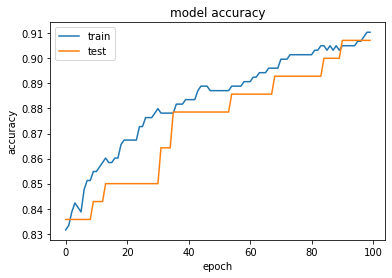

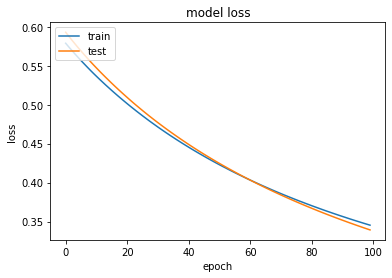

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
## Find misclassified sample
print('Testing labels', y_test)



Testing labels [0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1
 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1]


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_pred

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [ ]:
y_pred = np.array([y_pred[i][0] for i in range(len(y_pred))])
print()
print('Predicted labels',y_pred)


Predicted labels [0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1
 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0]


In [ ]:
y_test

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1])

In [ ]:
idx_misc = (y_test != y_pred)
idx_misc

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,

In [ ]:
np.where(idx_misc)[0]

array([ 22,  31,  32,  35,  41,  43,  54,  58,  61,  69,  84, 125, 139])

In [ ]:
X_test[22,:]

array([0.44444444, 0.22222222, 0.22222222, 0.33333333, 0.11111111,
       0.99994001, 0.22222222, 0.33333333, 0.        ])